In [220]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
# from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics  import accuracy_score, confusion_matrix , roc_auc_score , roc_curve

In [221]:
df=pd.read_csv('d_aiml_train_data.csv') #reading the dataset

In [222]:
df #printing dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,1,Psoriasis


In [223]:
df.describe() # analyzing trends of datasets

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,fluid_overload.1,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.023171,0.024390,0.046341,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.150461,0.154273,0.210245,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
df.isnull().sum() #checking null values

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
skin_peeling            0
silver_like_dusting     0
small_dents_in_nails    0
inflammatory_nails      0
prognosis               0
Length: 122, dtype: int64

In [225]:
# ProfileReport(df) #creating profile report of dataset for understanding dataset more clearly with graphs and figures

In [227]:
#dropping unnecessary columns
# df=df.drop(columns=['Unnamed: 133'])

In [228]:
#printing all unique disease present in dataset 
print(df['prognosis'].unique())

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [229]:
# splitting dataset into x and y dataframe for building a model
y=df['prognosis']
x=df.drop(columns='prognosis')

In [230]:
x.shape

(4920, 121)

In [231]:
# splitting data into training and testing dataset with splitting size of training 90% and testing 10%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=200)

In [232]:
#creating a decission tree classifier model
model=DecisionTreeClassifier()

In [233]:
# checking null values for each column
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
skin_peeling            0
silver_like_dusting     0
small_dents_in_nails    0
inflammatory_nails      0
prognosis               0
Length: 122, dtype: int64

In [234]:
#fitting the model on training data
model.fit(x_train,y_train) 

DecisionTreeClassifier()

In [235]:
#predicting values
model.predict(x_test)

array(['Chicken pox', '(vertigo) Paroymsal  Positional Vertigo',
       'Malaria', 'Migraine', 'Hepatitis C', 'Diabetes ', 'Impetigo',
       'Hypothyroidism', 'Heart attack', 'Common Cold',
       'Dimorphic hemmorhoids(piles)', 'Hypertension ', 'GERD',
       'Varicose veins', 'Dengue', 'Diabetes ', 'Chicken pox',
       'Chronic cholestasis', 'Dimorphic hemmorhoids(piles)', 'Migraine',
       'Osteoarthristis', 'Peptic ulcer diseae', 'Gastroenteritis',
       'Hypertension ', 'Acne', 'GERD', 'Hepatitis C', 'Gastroenteritis',
       'Pneumonia', 'Impetigo', 'Arthritis', 'Migraine',
       'Gastroenteritis', 'Impetigo', 'Hyperthyroidism',
       'Fungal infection', 'Hypertension ', 'Diabetes ',
       'Alcoholic hepatitis', 'Varicose veins', 'Drug Reaction',
       'Urinary tract infection', 'Hepatitis E',
       'Dimorphic hemmorhoids(piles)', 'Chicken pox',
       'Urinary tract infection', 'Alcoholic hepatitis',
       'Cervical spondylosis', 'Fungal infection',
       'Dimorphic h

In [236]:
# accuracy of  model
model.score(x_test,y_test)

1.0

In [237]:
# building a new model by passing hyperparameter of criteria as entropy
dt_en=DecisionTreeClassifier(criterion='entropy')
dt_en.fit(x_test,y_test) 
dt_en.score(x_test,y_test)


1.0

In [238]:
# to save the data on dot file and then see tree data
from sklearn import tree
outfile=dot_for_dt_en=open('dt_en_meta.dot','w')
tree.export_graphviz(dt_en,out_file=outfile,feature_names=x.columns)

In [239]:
import sklearn 
from sklearn import tree
%matplotlib inline

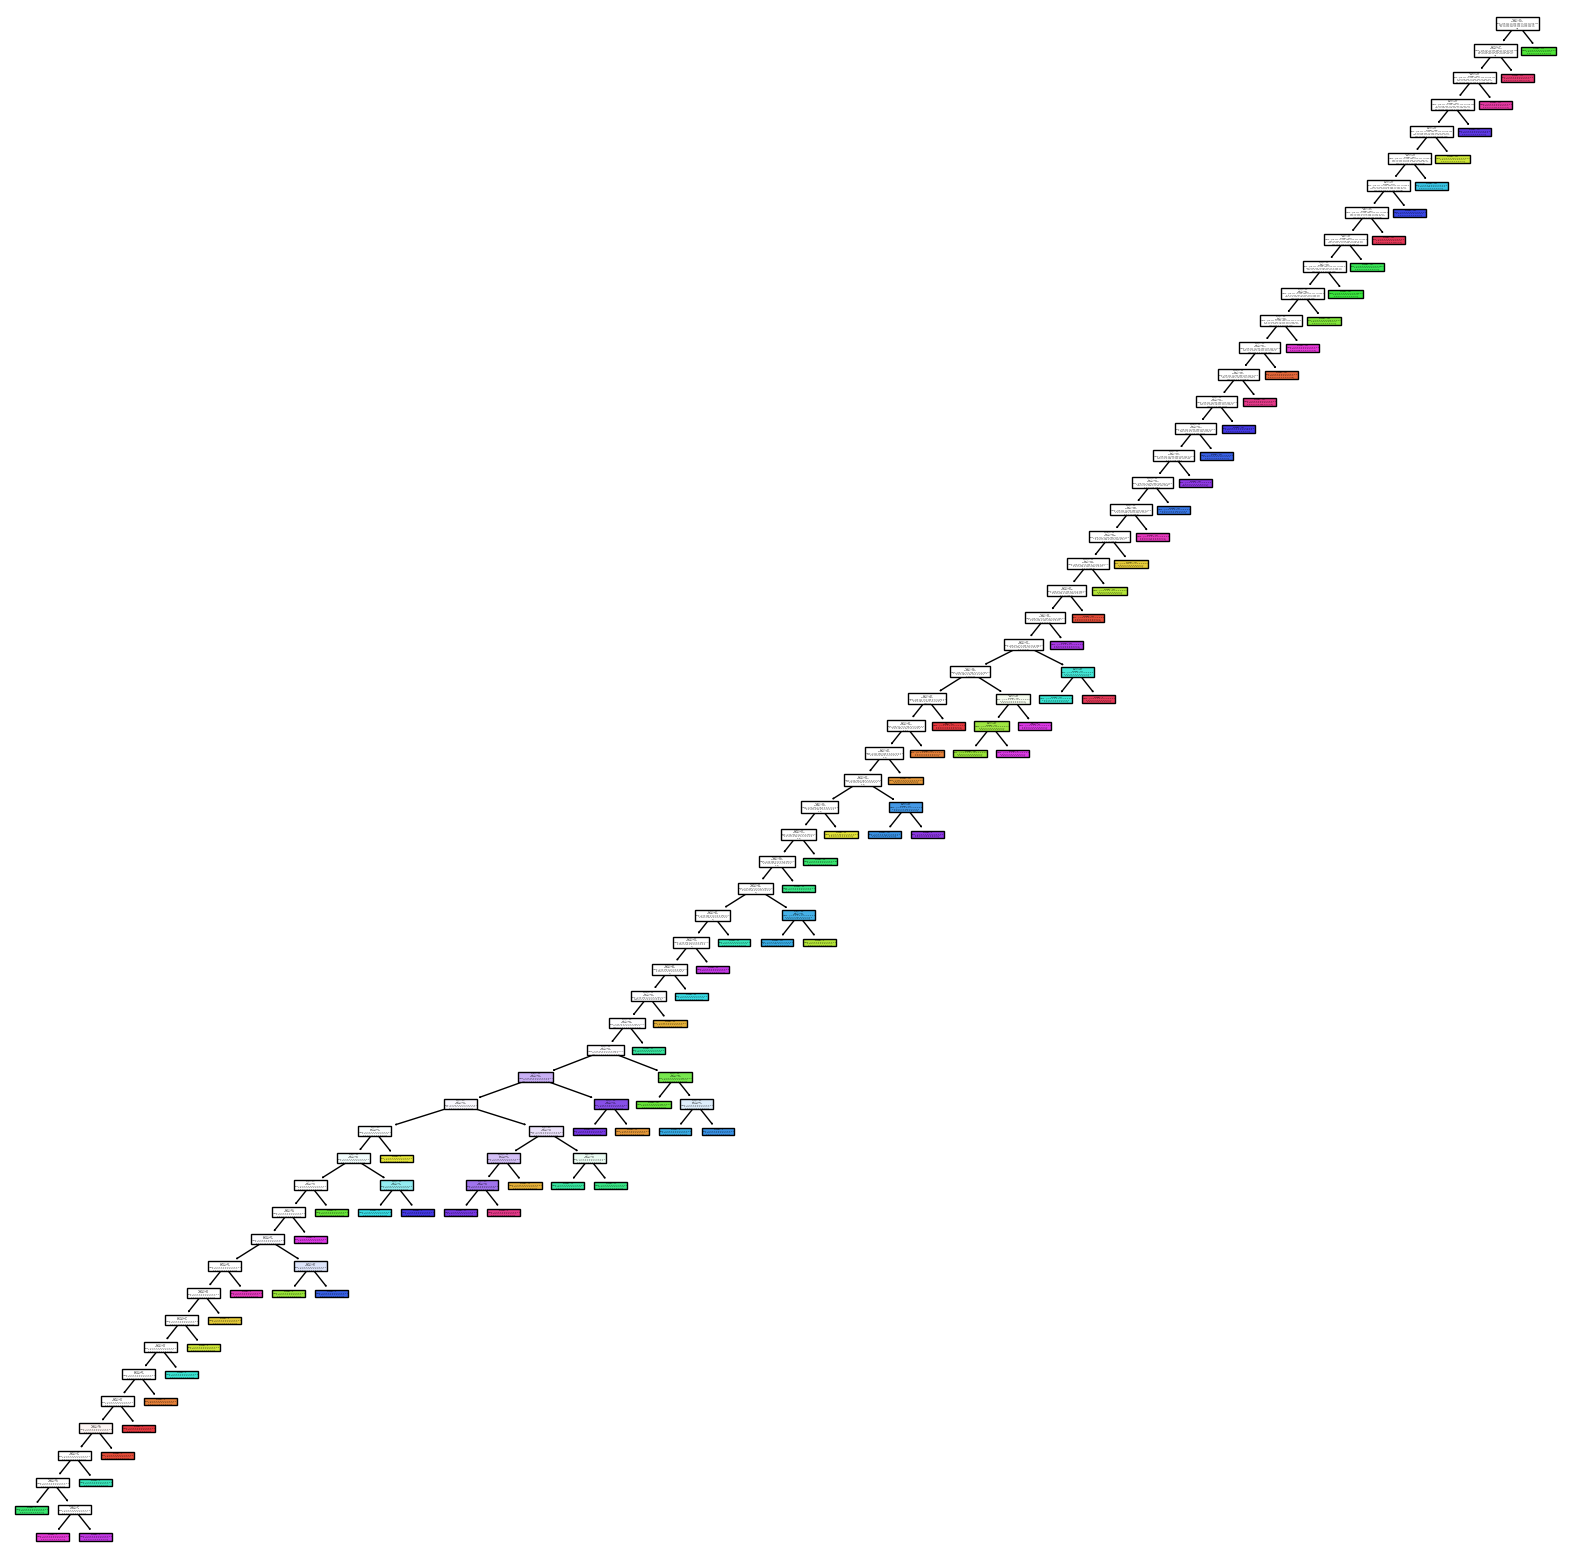

In [240]:
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True)
plt.show()

In [241]:
df1=df.head(50)

In [242]:
print(df1)

    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0         1          1                     1                    0          0   
1         0          1                     1                    0          0   
2         1          0                     1                    0          0   
3         1          1                     0                    0          0   
4         1          1                     1                    0          0   
5         0          1                     1                    0          0   
6         1          0                     1                    0          0   
7         1          1                     0                    0          0   
8         1          1                     1                    0          0   
9         1          1                     1                    0          0   
10        0          0                     0                    1          1   
11        0          0                  

In [243]:
x1=df1.drop(columns='prognosis')
y1=df1.prognosis
dt_model=DecisionTreeClassifier()
dt_model.fit(x1,y1)

DecisionTreeClassifier()

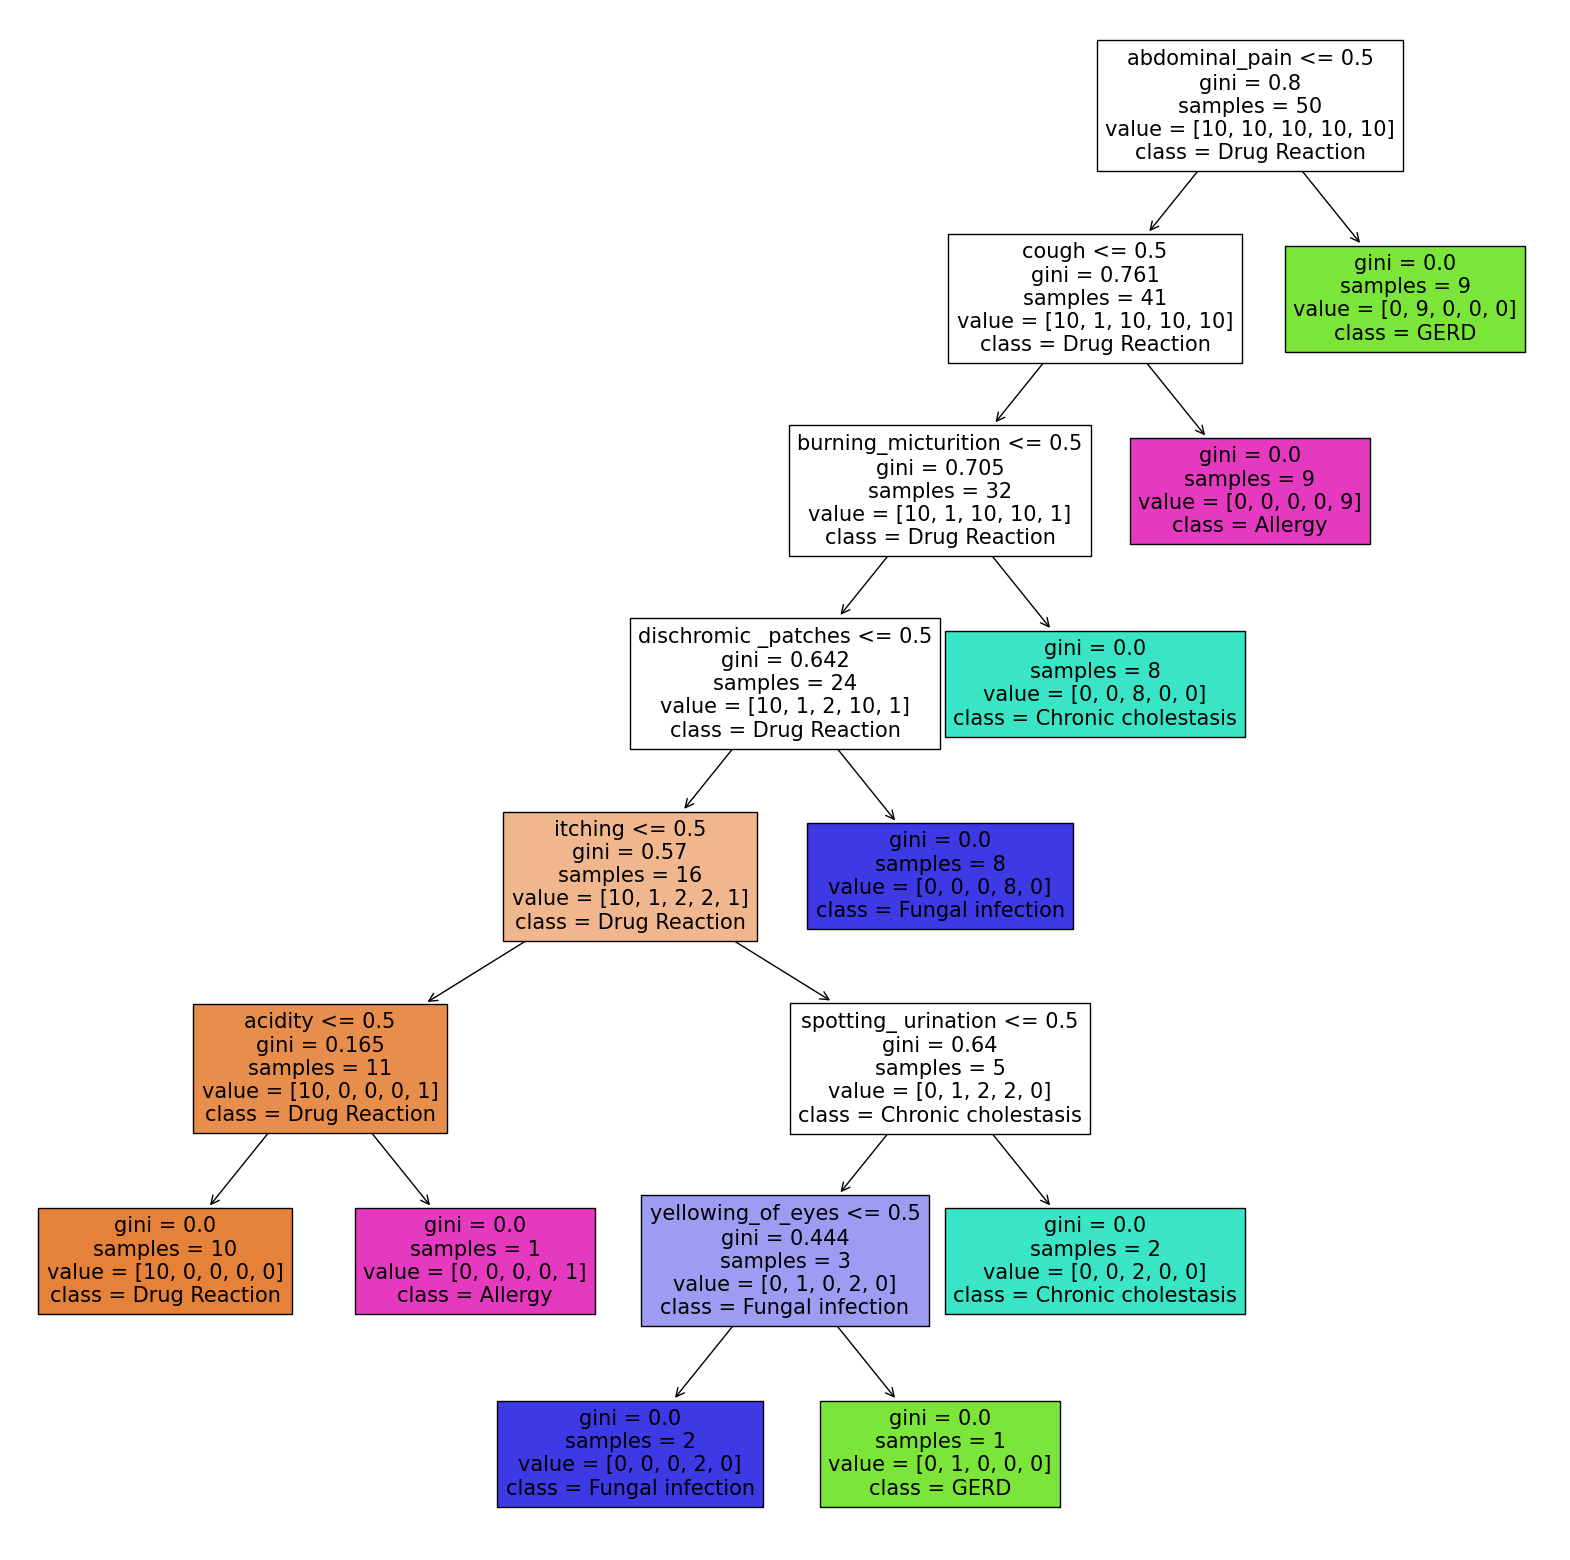

In [244]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True,class_names=[str(i) for i in set(y1)],feature_names=x1.columns) 
#classes converted into strings because class_names attribute only support strings so we convert numerical into string list
plt.show()

In [245]:
dt_model.predict(x1)

array(['Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Fungal infection', 'Fungal infection',
       'Fungal infection', 'Allergy', 'Allergy', 'Allergy', 'Allergy',
       'Allergy', 'Allergy', 'Allergy', 'Allergy', 'Allergy', 'Allergy',
       'GERD', 'GERD', 'GERD', 'GERD', 'GERD', 'GERD', 'GERD', 'GERD',
       'GERD', 'GERD', 'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis', 'Drug Reaction',
       'Drug Reaction', 'Drug Reaction', 'Drug Reaction', 'Drug Reaction',
       'Drug Reaction', 'Drug Reaction', 'Drug Reaction', 'Drug Reaction',
       'Drug Reaction'], dtype=object)

In [246]:
 dt_model.score(x1,y1) # can be consider as training accuracy as we didn't split the data for model

1.0

In [247]:
dt_model.predict(x_test) 
#trying to check for huge data which we used in above model give 50 as learning dataset which onl have 4 classes we can see in set(y1)
#but in x_test i.e actual data we have 6 classes but our model donn't know so predicted wrong

array(['Fungal infection', 'Allergy', 'Allergy', 'GERD', 'Allergy',
       'Allergy', 'Allergy', 'Allergy', 'Allergy', 'GERD', 'Allergy',
       'Allergy', 'GERD', 'Allergy', 'Allergy', 'Allergy',
       'Fungal infection', 'Chronic cholestasis', 'Allergy', 'GERD',
       'Allergy', 'Chronic cholestasis', 'Allergy', 'Allergy', 'Allergy',
       'GERD', 'Allergy', 'Allergy', 'GERD', 'Allergy', 'Allergy', 'GERD',
       'Allergy', 'Allergy', 'Allergy', 'Fungal infection', 'Allergy',
       'Allergy', 'Chronic cholestasis', 'Allergy', 'Drug Reaction',
       'Allergy', 'Chronic cholestasis', 'Allergy', 'Allergy',
       'Drug Reaction', 'Chronic cholestasis', 'Allergy',
       'Fungal infection', 'Allergy', 'Chronic cholestasis',
       'Drug Reaction', 'Allergy', 'Chronic cholestasis',
       'Chronic cholestasis', 'Chronic cholestasis', 'Fungal infection',
       'Allergy', 'Fungal infection', 'Allergy', 'GERD', 'Allergy',
       'Chronic cholestasis', 'Allergy', 'Fungal infection', 'Al

In [248]:
dt_model.score(x_test,y_test) # because of above reason accuracy is less

0.1402439024390244

In [249]:
set(y1)

{'Allergy', 'Chronic cholestasis', 'Drug Reaction', 'Fungal infection', 'GERD'}

In [250]:
# to save the tree graph
# plt.savefig('dt_model')

In [251]:
#post pruning
path=model.cost_complexity_pruning_path(x1,y1)
ccp_alpha=path.ccp_alphas

In [252]:
path

{'ccp_alphas': array([0.        , 0.02      , 0.03      , 0.03666667, 0.03833333,
        0.0575    , 0.12583333, 0.14291667, 0.17314024, 0.17560976]),
 'impurities': array([0.        , 0.02      , 0.05      , 0.08666667, 0.125     ,
        0.1825    , 0.30833333, 0.45125   , 0.62439024, 0.8       ])}

In [253]:
ccp_alpha

array([0.        , 0.02      , 0.03      , 0.03666667, 0.03833333,
       0.0575    , 0.12583333, 0.14291667, 0.17314024, 0.17560976])

In [254]:
dt_model1=[]
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model1.append(dt_m)

In [255]:
dt_model1

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.02),
 DecisionTreeClassifier(ccp_alpha=0.030000000000000002),
 DecisionTreeClassifier(ccp_alpha=0.03666666666666665),
 DecisionTreeClassifier(ccp_alpha=0.038333333333333344),
 DecisionTreeClassifier(ccp_alpha=0.057499999999999996),
 DecisionTreeClassifier(ccp_alpha=0.12583333333333335),
 DecisionTreeClassifier(ccp_alpha=0.14291666666666664),
 DecisionTreeClassifier(ccp_alpha=0.17314024390243915),
 DecisionTreeClassifier(ccp_alpha=0.1756097560975609)]

In [256]:
train_score=[i.score(x1,y1)for i in dt_model1]

In [257]:
test_score=[i.score(x_test,y_test)for i in dt_model1]

In [258]:
print(train_score)

[1.0, 0.98, 0.96, 0.96, 0.88, 0.94, 0.72, 0.56, 0.38, 0.2]


In [259]:
print(test_score)

[0.1402439024390244, 0.13617886178861788, 0.13617886178861788, 0.13414634146341464, 0.12804878048780488, 0.13617886178861788, 0.09959349593495935, 0.08130081300813008, 0.054878048780487805, 0.024390243902439025]


Through this we need to select the ccp value where test and train score is approx same their is not much huge diff

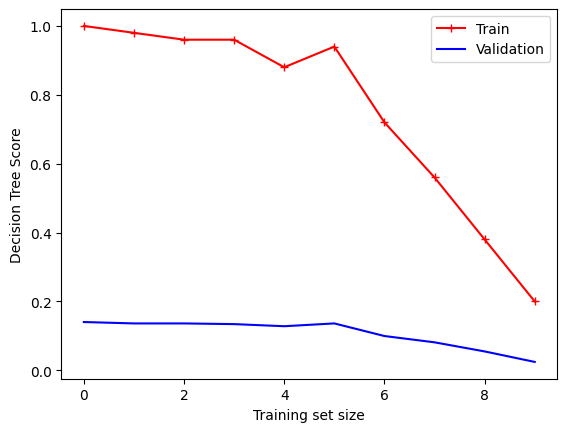

In [260]:
plt.plot(train_score,'r-+',label='Train')
plt.plot(test_score,'b-',label='Validation')
plt.xlabel('Training set size')
plt.ylabel('Decision Tree Score')
plt.legend()

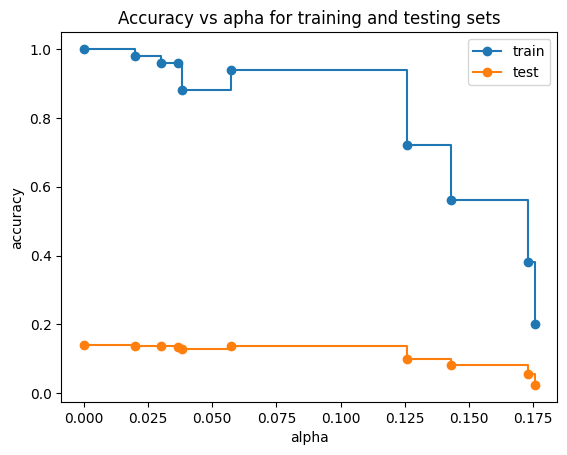

In [261]:
fix,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs apha for training and testing sets")
ax.plot(ccp_alpha,train_score,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alpha,test_score,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [262]:
train_score

[1.0, 0.98, 0.96, 0.96, 0.88, 0.94, 0.72, 0.56, 0.38, 0.2]

In [263]:
dt_model_ccp = DecisionTreeClassifier(random_state=0,ccp_alpha=0.014)
dt_model_ccp.fit(x1,y1)


DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

In [264]:
dt_model_ccp.score(x1,y1)

1.0

In [265]:
dt_model_ccp.score(x_test,y_test)

0.1402439024390244

### After prunning using ccp alpha we get approx saem score for training and testing score so we can say that our model is efficient now

[Text(0.8181818181818182, 0.95, 'X[35] <= 0.5\ngini = 0.8\nsamples = 50\nvalue = [10, 10, 10, 10, 10]'),
 Text(0.7272727272727273, 0.85, 'X[55] <= 0.5\ngini = 0.761\nsamples = 41\nvalue = [10, 1, 10, 10, 10]'),
 Text(0.6363636363636364, 0.75, 'X[4] <= 0.5\ngini = 0.705\nsamples = 32\nvalue = [10, 1, 10, 10, 1]'),
 Text(0.5454545454545454, 0.65, 'X[12] <= 0.5\ngini = 0.642\nsamples = 24\nvalue = [2, 1, 10, 10, 1]'),
 Text(0.45454545454545453, 0.55, 'X[2] <= 0.5\ngini = 0.57\nsamples = 16\nvalue = [2, 1, 2, 10, 1]'),
 Text(0.36363636363636365, 0.45, 'X[97] <= 0.5\ngini = 0.781\nsamples = 8\nvalue = [2, 1, 2, 2, 1]'),
 Text(0.2727272727272727, 0.35, 'X[3] <= 0.5\ngini = 0.722\nsamples = 6\nvalue = [2, 1, 2, 0, 1]'),
 Text(0.18181818181818182, 0.25, 'X[11] <= 0.5\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 2, 0, 1]'),
 Text(0.09090909090909091, 0.15, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(0.2727272727272727, 0.15, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 

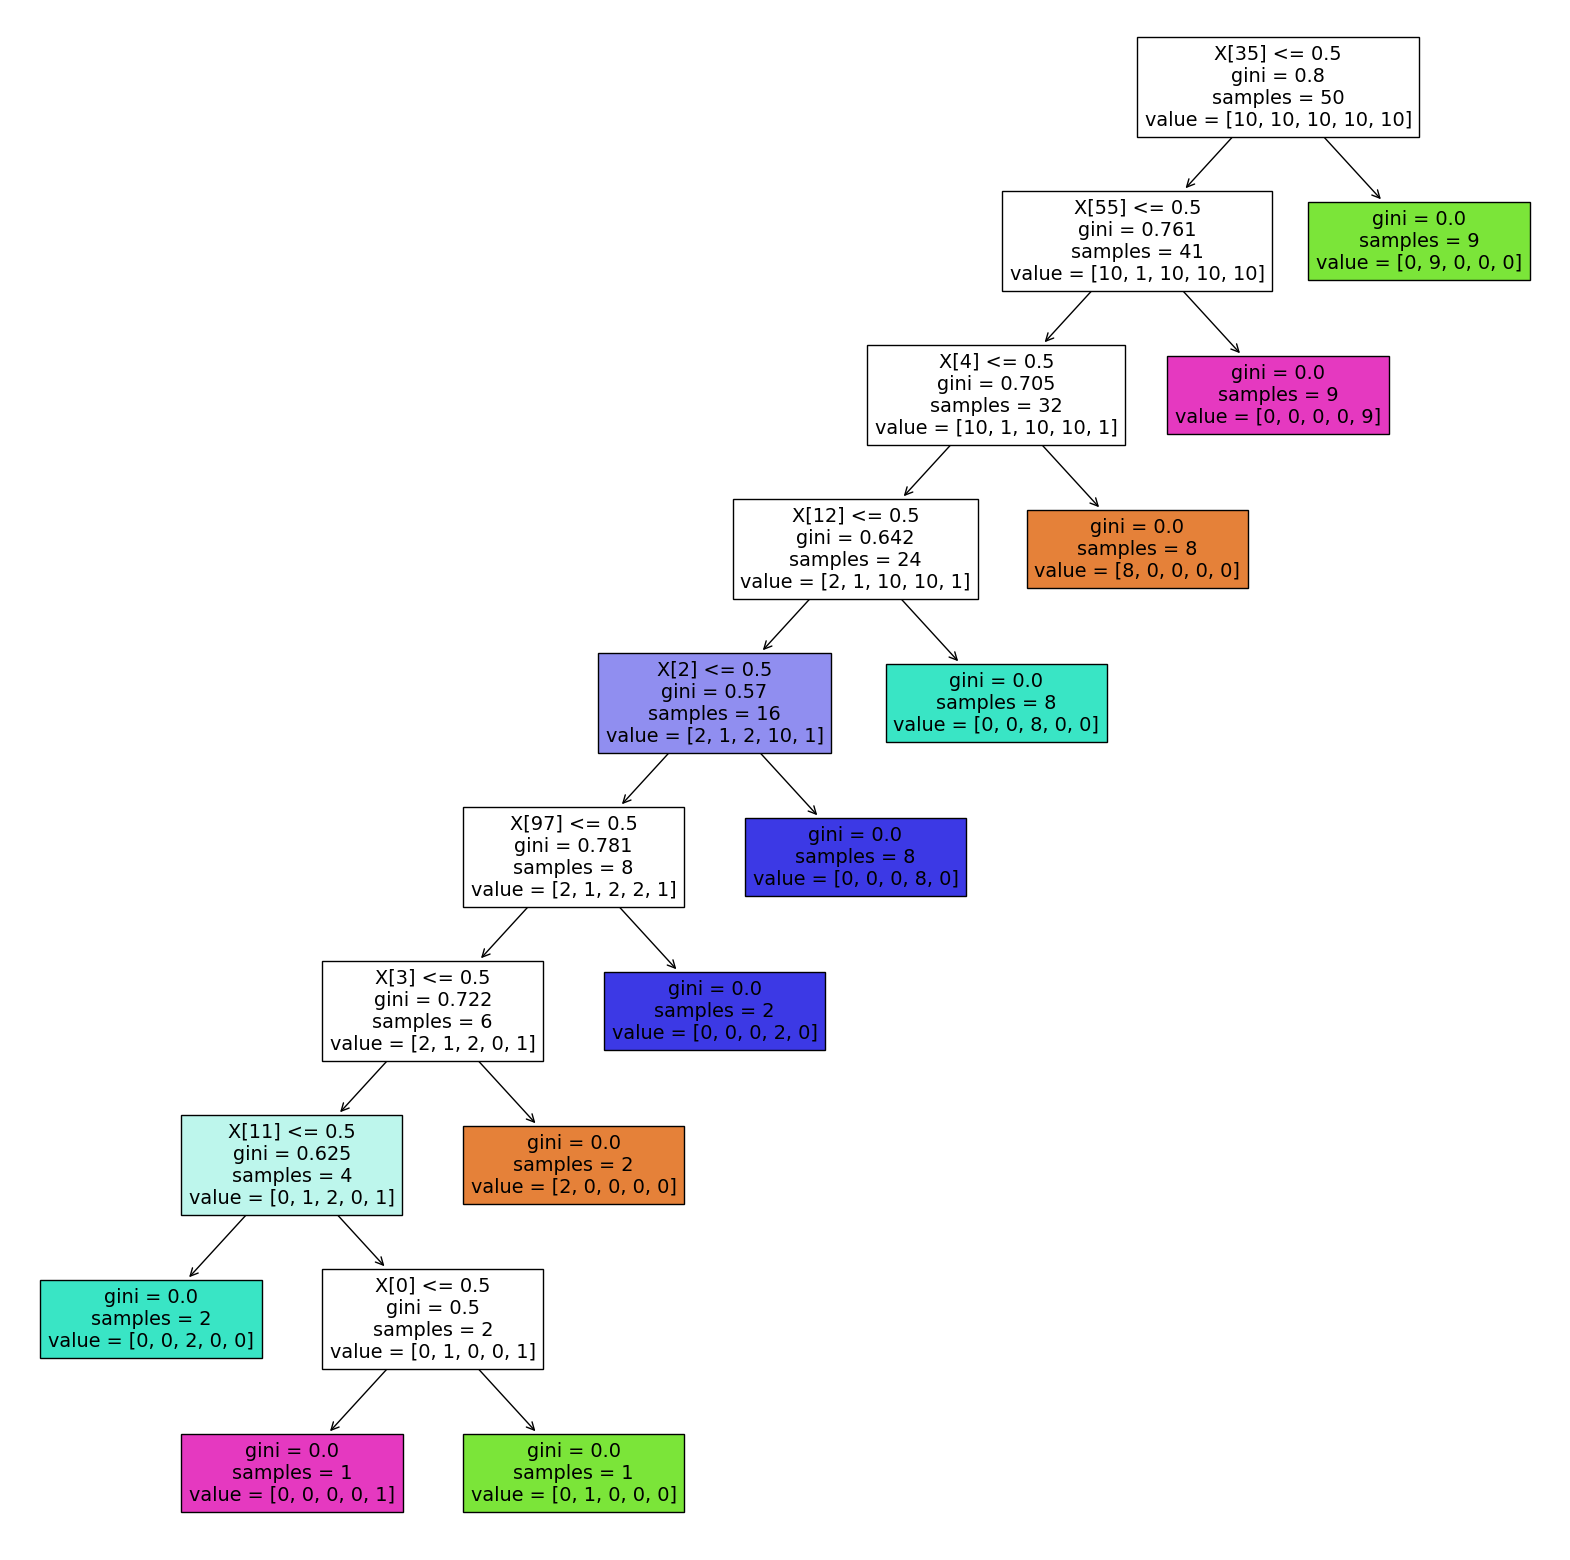

In [266]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [267]:
DecisionTreeClassifier()
grid_pram={"criterion":['gini','entropy'],
          "splitter":['best','random'],
          "max_depth":range(2,40,1),
          "min_samples_split":range(2,10,1),
          "min_samples_leaf":range(1,10,1)}

In [268]:
grid_ccp=GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram,cv=5,n_jobs=-1) # -1 in n_jobs means occupy all the process in cpu , if we inc like -4 then it will not execute all the  rocess as it will slow down processing speed

In [269]:
grid_ccp.fit(x1,y1)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [270]:
grid_ccp.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [271]:
3# yper parmeter tuning
dt_ccp_new=DecisionTreeClassifier(criterion='gini',max_depth=35,ccp_alpha=0.014,min_samples_leaf=4,min_samples_split=9,splitter='best')

In [272]:
dt_ccp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, max_depth=35, min_samples_leaf=4,
                       min_samples_split=9)

In [273]:
dt_ccp_new.score(x1,y1)

0.88

In [274]:
dt_ccp_new.score(x_test,y_test)

0.12804878048780488

done hyper parameter tuning but still having over fitting 

In [275]:
pred =dt_ccp_new.predict(x_train)

In [276]:
confusion_matrix(y_train,pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [277]:
X=df.drop(columns=['prognosis'])

In [278]:
Y=df.prognosis

In [279]:
from sklearn.ensemble import BaggingClassifier

In [280]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0) # by default split size is 75 25

In [281]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10)

In [282]:
bag_dt.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [283]:
bag_dt.predict(X_test)

array(['Heart attack', 'hepatitis A', 'Tuberculosis', ..., 'hepatitis A',
       'Gastroenteritis', 'Allergy'], dtype=object)

In [284]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [285]:
from sklearn.neighbors import KNeighborsClassifier 
bag_knn=BaggingClassifier(KNeighborsClassifier(),n_estimators=10)

In [286]:
bag_knn.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier())

In [287]:
bag_knn.predict(X_test)

array(['Heart attack', 'hepatitis A', 'Tuberculosis', ..., 'hepatitis A',
       'Gastroenteritis', 'Allergy'], dtype=object)

In [288]:
from sklearn.ensemble import RandomForestClassifier

In [289]:
rf=RandomForestClassifier(n_estimators=5)

In [290]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=5)

In [291]:
rf.score(X_test,Y_test)

1.0

In [292]:
bag_dt.score(X_test,Y_test)

1.0

In [293]:
bag_knn.score(X_test,Y_test)

1.0

In [294]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1458127720),
 DecisionTreeClassifier(max_features='sqrt', random_state=1745677495),
 DecisionTreeClassifier(max_features='sqrt', random_state=2005687069),
 DecisionTreeClassifier(max_features='sqrt', random_state=1497090639),
 DecisionTreeClassifier(max_features='sqrt', random_state=1075598338)]

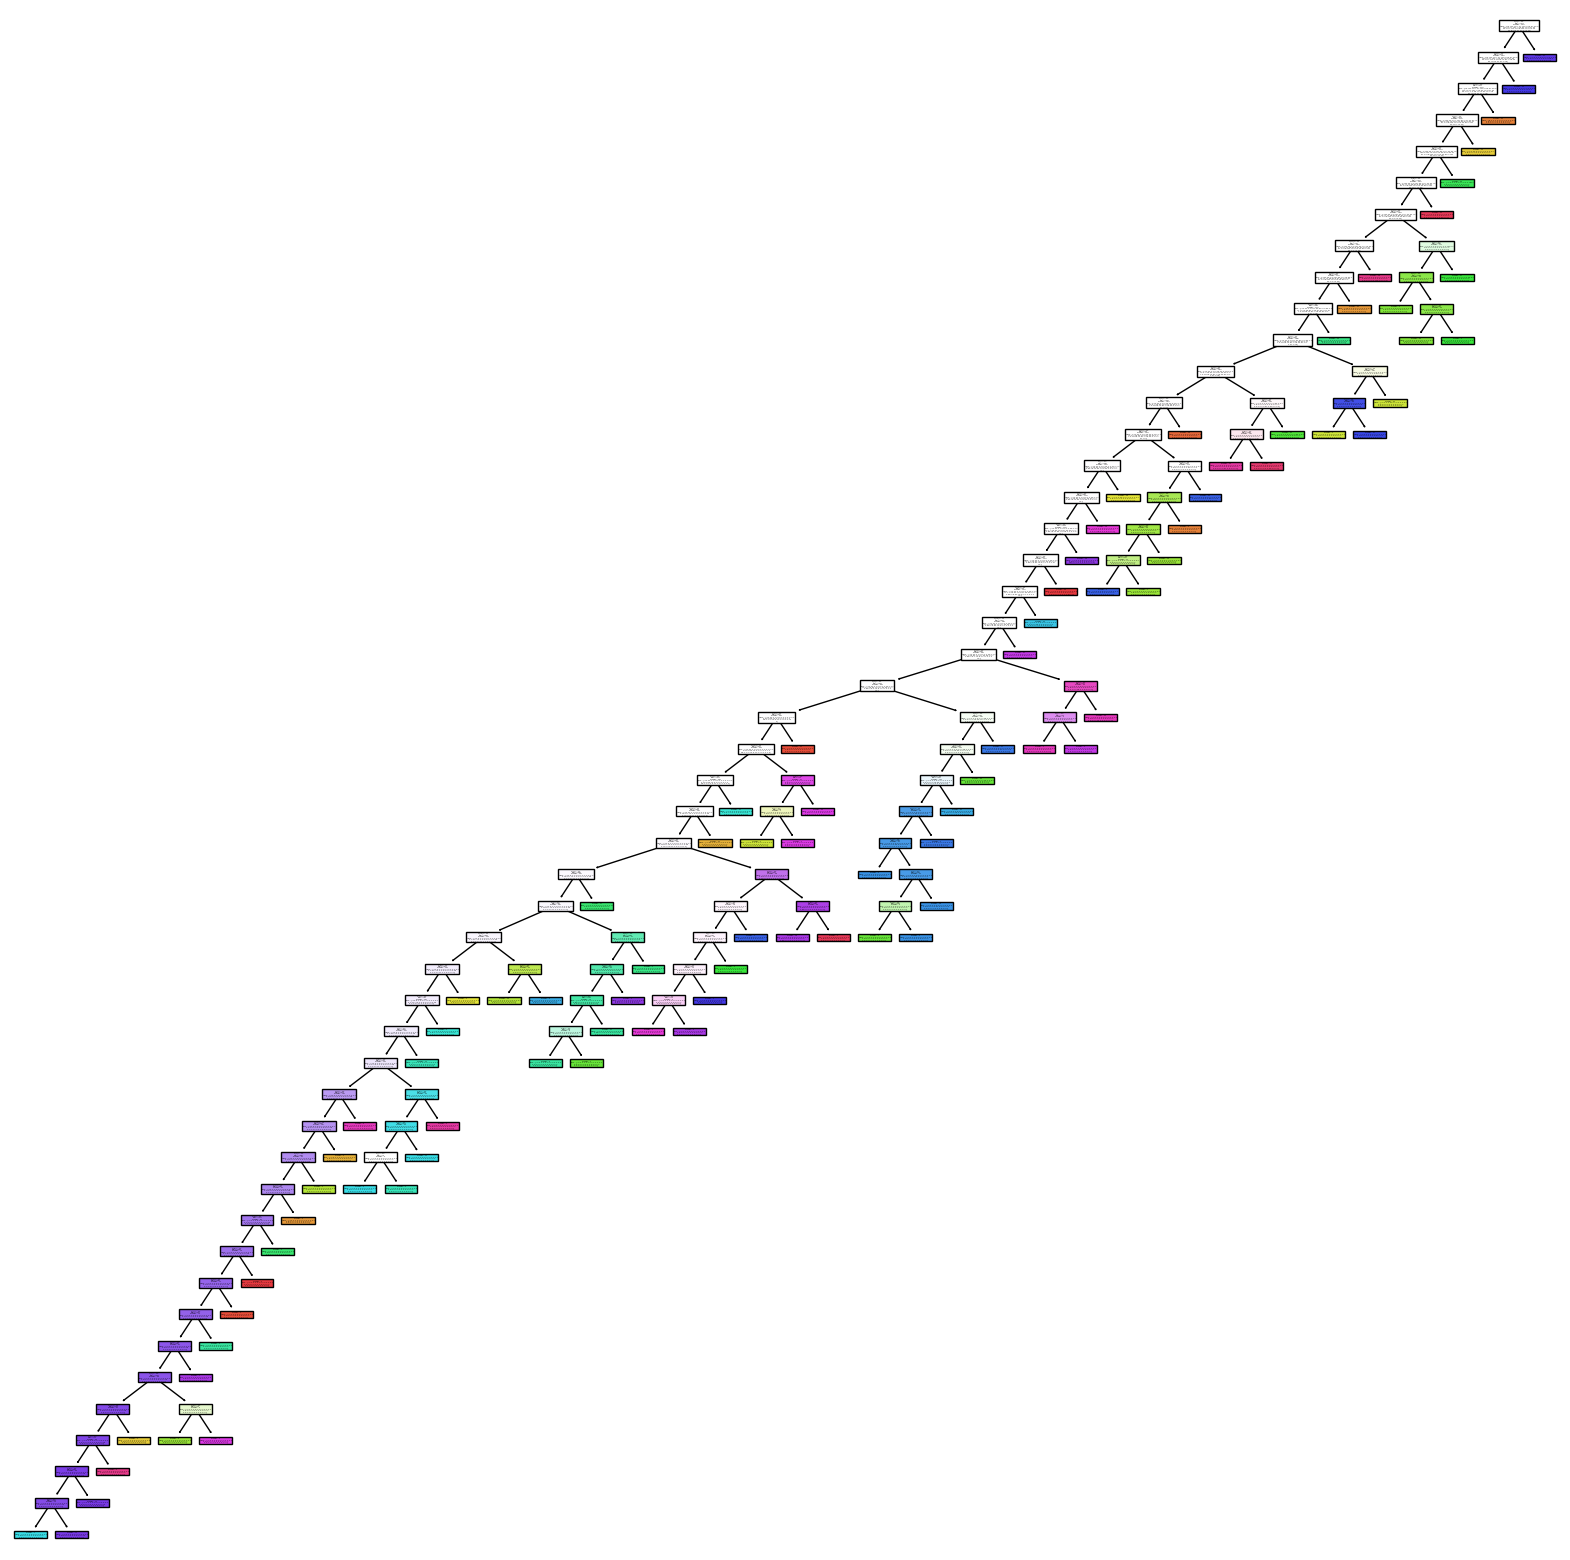

In [295]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)
plt.show() 

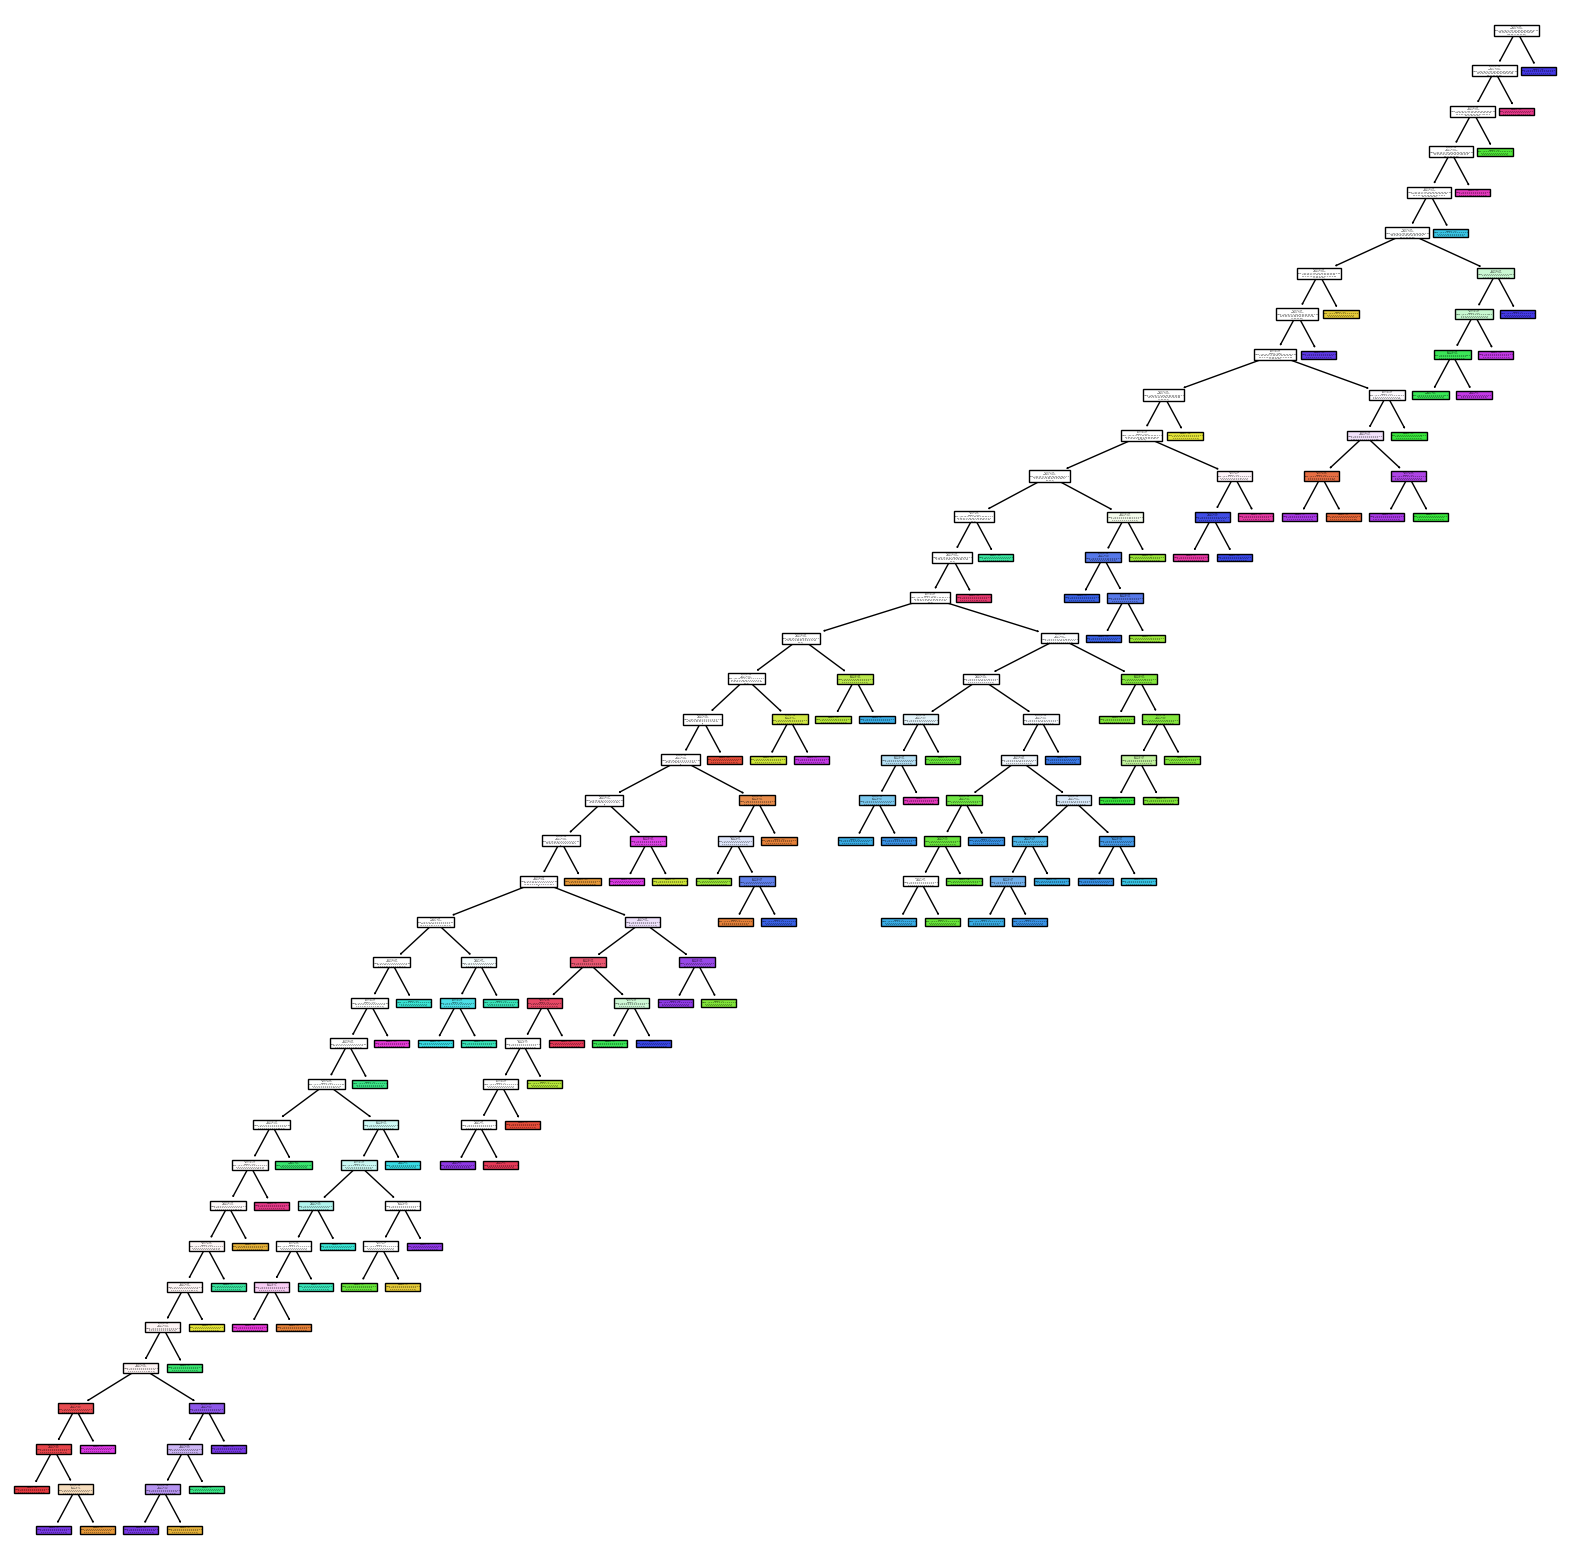

In [296]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i],filled=True)


In [297]:
grid_pram={"n_estimators":[5,10,50,100,120],
          'criterion':['gini','entropy'],
          'max_depth':range(10),
          'min_samples_leaf':range(10)}

In [298]:
rf1=RandomForestClassifier(n_estimators=5)

In [299]:
grid_search_rf=GridSearchCV(param_grid=grid_pram,cv=10,n_jobs=6,estimator=rf)

In [300]:
grid_search_rf.fit(X_train,Y_train)

c:\Users\Sandeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1900 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Sandeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Sandeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\Sandeep\AppData\Local\Programs\Python\Python310\lib\site-packages\jobl

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120]})

In [314]:
grid_search_rf.score(X_test,Y_test)

1.0

In [315]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'n_estimators': 120}

In [334]:
Best_rf=RandomForestClassifier(criterion='gini',
 max_depth=9,
 min_samples_leaf=8,
 n_estimators=100)

In [335]:
Best_rf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=8)

In [336]:
Best_rf.score(X_test,Y_test)

1.0

In [337]:
pr=Best_rf.predict(X_test)

In [338]:
confusion_matrix(Y_test,pr)

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0, 27,  0, ...,  0,  0,  0],
       [ 0,  0, 34, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 28,  0,  0],
       [ 0,  0,  0, ...,  0, 34,  0],
       [ 0,  0,  0, ...,  0,  0, 33]], dtype=int64)

In [339]:
# Saving the model as sav file for using it as pre trained model
import pickle as pkl 
file='DT.sav'
pkl.dump(bag_dt,open(file,'wb'))

In [348]:
# calling pretrained model
s=pkl.load(open('DT.sav','rb'))
#reading testing data file
test_data=pd.read_csv("Aiml_disease_test_data.csv")

In [349]:
l1=df.columns
len(l1)

122

In [350]:
l2=test_data.columns
len(l2)

122

In [351]:
# making dataframes of testing data

x_t=test_data.drop(columns=['prognosis'])
y_t=test_data.prognosis

In [352]:
# printing x datafram
x_t

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,fluid_overload.1,blood_in_sputum,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [353]:
# predicing values using pre trained model
s.predict(x_t)

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Chicken pox'],
      dtype=object)

In [354]:
# Accuracy score using pre trained model
s.score(x_t,y_t)

0.9761904761904762

In [355]:
a=x_t.iloc[1]

In [356]:
a

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     1
shivering               1
                       ..
scurring                0
skin_peeling            0
silver_like_dusting     0
small_dents_in_nails    0
inflammatory_nails      0
Name: 1, Length: 121, dtype: int64

In [357]:
s.predict([a])

c:\Users\Sandeep\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array(['Allergy'], dtype=object)

In [358]:
l=df.columns

In [359]:
print(l[0:50])

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition',
       'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety',
       'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness',
       'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'malaise', 'blurred_and_distorted_vision', 'phlegm'],
      dtype='object')


In [360]:
l[50:100]

Index(['throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose',
       'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate',
       'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool',
       'irritation_in_anus', 'neck_pain', 'dizziness', 'cramps', 'bruising',
       'obesity', 'swollen_legs', 'puffy_face_and_eyes', 'enlarged_thyroid',
       'brittle_nails', 'excessive_hunger', 'extra_marital_contacts',
       'drying_and_tingling_lips', 'knee_pain', 'hip_joint_pain',
       'muscle_weakness', 'stiff_neck', 'swelling_joints',
       'movement_stiffness', 'spinning_movements', 'loss_of_balance',
       'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell',
       'bladder_discomfort', 'foul_smell_of urine', 'continuous_feel_of_urine',
       'passage_of_gases', 'internal_itching', 'depression', 'irritability',
       'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'abnormal_menstruation', 'dischromic 

In [361]:
l[100:133]

Index(['family_history', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'visual_disturbances',
       'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma',
       'stomach_bleeding', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1', 'blood_in_sputum',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails',
       'inflammatory_nails', 'prognosis'],
      dtype='object')

In [368]:
#printing all unique disease present in dataset 
k=df['prognosis'].unique()

In [369]:
len(k)

41

In [363]:
df.count(1)

0       122
1       122
2       122
3       122
4       122
       ... 
4915    122
4916    122
4917    122
4918    122
4919    122
Length: 4920, dtype: int64